# In this notebook...

we used the MESA cohort to show how hypnosPy can be used to classify sleep using expert annotations and showcase how sleep metrics can be derived from these annotations as well. 

In one particular example participant, we show that their sleep regularity is poor and total sleep time in two out of the five nights is short.

Further, we show, at a population level how HypnosPy can be used to analyze the association of TST and SRI and even cluster individuals based on SRI levels. 

These type of analyses on SRI in a large population study help confirm previous findings reported in the [literature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6154967/). HypnosPy allows for a variety of other analyses and visualizations given different input modalities.  


In [1]:
from glob import glob
from hypnospy import Wearable, Experiment
from hypnospy.data import MESAPreProcessing
from hypnospy.analysis import Viewer, NonWearingDetector, SleepMetrics, SleepBoudaryDetector

In [2]:
# We load all MESA sleep files from disk. These are the original files from sleepdata.org.
files = glob("../data/examples_mesa/actigraphy/mesa-sleep-*.csv")
exp = Experiment()
for file in files[:100]:  # To speed up this experiment, we will only load the first 100 files
    # MESAPreProcessing is a specialized class to preprocess devices from the MESA Sleep collection
    # A column 'hyp_annotation' is automatically created based on annotations of sleep from MESA Sleep
    # (for more details see package documentation, i.e., online or running ``MESAPreProcessing?'' on a terminal)
    preprocessed = MESAPreProcessing(file)

    # Wearables are the main object in Hypnospy.
    # Here we shift the start hour of our experiment day to 3pm
    # And take advantage of the Experiment class to process multiple wearables at same time
    w = Wearable(preprocessed)
    w.change_start_hour_for_experiment_day(15)
    exp.add_wearable(w)

# HypnosPy is able to infer the data frequency, but the user can modify it with this command:
exp.set_freq_in_secs(30)
print("Loaded %d objects" % (len(exp.get_all_wearables())))

Loaded 28 objects


In [3]:
# Once more, we remove the non wearing days with this set of commands:
nwd = NonWearingDetector(exp)
nwd.detect_non_wear(strategy="choi")
nwd.check_valid_days(max_non_wear_minutes_per_day=180)
nwd.drop_invalid_days()

/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 288 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1206 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1294 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1215 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1227 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1212 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1284 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1224 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1263 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1265 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1204 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1216 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1291 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1297 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1236 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1222 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1256 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1268 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1219 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1281 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1280 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1209 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1213 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1271 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1260 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1290 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1278 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1266 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


In [4]:
# And annotate sleep boundaries using the default annotations from MESA dataset:
sbd = SleepBoudaryDetector(exp)
sbd.detect_sleep_boundaries(strategy="annotation", annotation_col="hyp_annotation",
                            output_col="SleepBoundariesFromAnnotations", annotation_merge_tolerance_in_minutes=30)


/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/misc.py:22: UserWarning: Day has no sleep period!
/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/sleep_boundary_detector.py:358: UserWarning: No data for PID 1212. Skipping it.
/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/sleep_boundary_detector.py:358: UserWarning: No data for PID 1204. Skipping it.


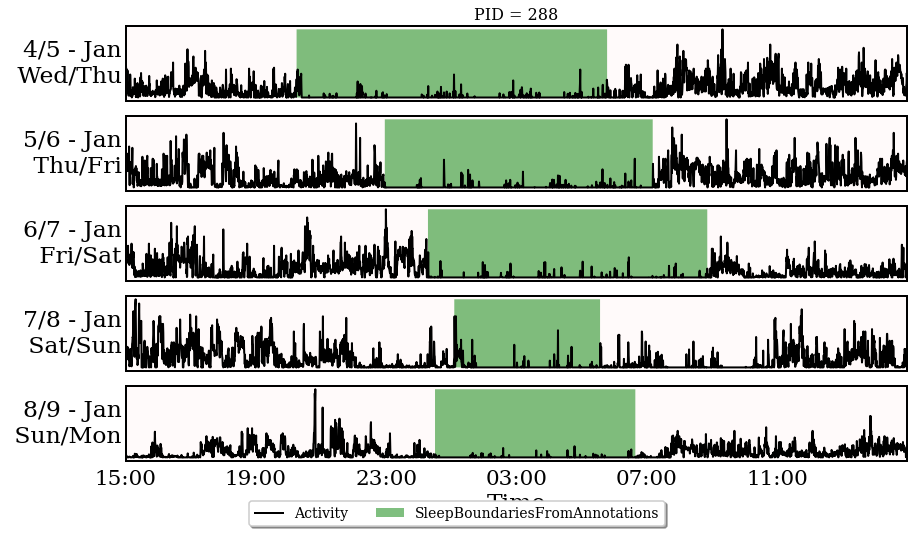

In [5]:
# We pick a random wearable to visualize what was done so far:
v = Viewer(exp.get_wearable("288"))
v.view_signals(signal_categories=["activity"], signal_as_area=["SleepBoundariesFromAnnotations"],
               colors={"area": ["green"]}, alphas={"area": 0.5})


Unable to calculate SRI for day 1 (PID = 1224).


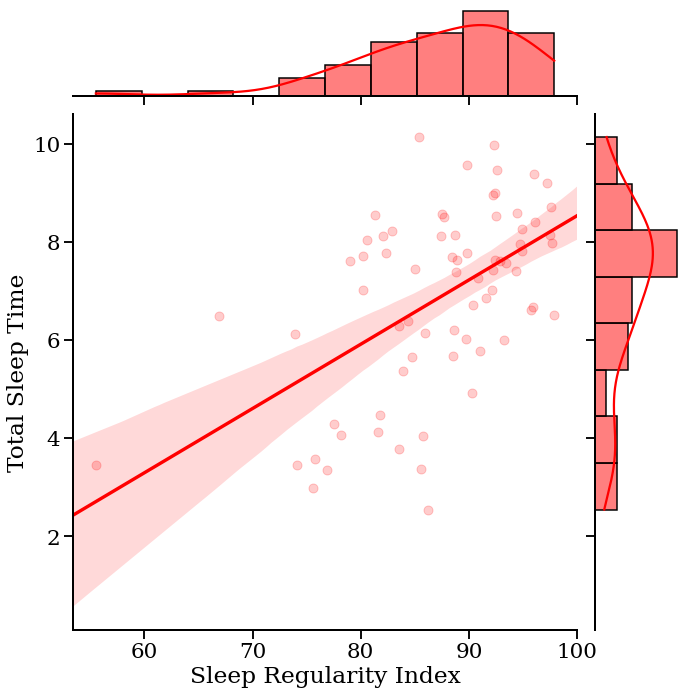

In [6]:
# Calculate a few sleep metrics for the whole population
sm = SleepMetrics(exp)
sri = sm.get_sleep_quality("hyp_annotation", metric="sri")
tst = sm.get_sleep_quality("hyp_annotation", metric="totalTimeInBed", sleep_period_col="SleepBoundariesFromAnnotations")
# And plot these sleep metrics to investigate tendencies in dataset:
v.plot_two_sleep_metrics(sri, tst, label_a="Sleep Regularity Index", label_b="Total Sleep Time", color="red", alpha=0.2)